In [3]:
###Project: Investigate a Dataset - [Soccer Database]

##Introduction:-
#This is data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

##project questions:-
# What teams improved the most over the time period?
# What team attributes lead to the most victories?
# Which players had the most penalties?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import datetime
%matplotlib inline
import seaborn as sns

In [5]:
# Load your data and print out a few lines. 
engine = ('sqlite:///C:/Users/admin/Downloads/Compressed/Soccer Database/database.sqlite/')
df = pd.read_sql('SELECT * FROM master', engine)
#Perform operations to inspect data
df.head(20)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,index,sqlite_autoindex_Player_1,Player,15,None
4,index,sqlite_autoindex_Player_2,Player,17,None
5,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
6,index,sqlite_autoindex_Match_1,Match,19,None
7,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
8,index,sqlite_autoindex_League_1,League,25,None
9,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...


In [6]:
#biggest data set found in Matches table which help us two questions 
Match = pd.read_sql("""SELECT * FROM Match;""",engine)
# Assessing and Building Intuition
Match.info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [7]:
#Cleaning Data from Match Table & change data type for date
Match.fillna(Match.mean(), inplace=True)
Match.info()
sum(Match.duplicated())
Match['date'] = pd.to_datetime(Match['date'])
Match['date'] = Match['date'].dt.year

C:\Users\admin\AppData\Local\Temp/ipykernel_27448/3317784403.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Match.fillna(Match.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [8]:
#Exploratory Data Analysis
match_col = Match[['season','stage','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','date']]
match_col['result'] = match_col['home_team_goal'] - match_col['away_team_goal']
match_col['winner_home'] = match_col['result'] >0
match_col['winner_away'] = match_col['result'] <0
match_col.winner_home = match_col.winner_home.replace({True: 1, False: 0})
match_col.winner_away = match_col.winner_away.replace({True: 1, False: 0})
match_col


C:\Users\admin\AppData\Local\Temp/ipykernel_27448/1273121209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_col['result'] = match_col['home_team_goal'] - match_col['away_team_goal']
C:\Users\admin\AppData\Local\Temp/ipykernel_27448/1273121209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_col['winner_home'] = match_col['result'] >0
C:\Users\admin\AppData\Local\Temp/ipykernel_27448/1273121209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,date,result,winner_home,winner_away
0,2008/2009,1,9987,9993,1,1,2008,0,0,0
1,2008/2009,1,10000,9994,0,0,2008,0,0,0
2,2008/2009,1,9984,8635,0,3,2008,-3,0,1
3,2008/2009,1,9991,9998,5,0,2008,5,1,0
4,2008/2009,1,7947,9985,1,3,2008,-2,0,1
...,...,...,...,...,...,...,...,...,...,...
25974,2015/2016,9,10190,10191,1,0,2015,1,1,0
25975,2015/2016,9,9824,10199,1,2,2015,-1,0,1
25976,2015/2016,9,9956,10179,2,0,2015,2,1,0
25977,2015/2016,9,7896,10243,0,0,2015,0,0,0


In [23]:
#Merging between home & away matches in order to calculate total wins for each team
def home_away():
    home = match_col[['date','home_team_api_id','home_team_goal','winner_home','stage']]
    home = home.groupby(['home_team_api_id','date',]).agg({'winner_home':'sum','home_team_goal': 'sum'}).reset_index().sort_values(['winner_home','home_team_goal'], ascending =False)
    away = match_col[['date','away_team_api_id','away_team_goal','winner_away','stage']]
    away = away.groupby(['away_team_api_id','date',]).agg({'winner_away':'sum','away_team_goal': 'sum'}).reset_index().sort_values(['winner_away','away_team_goal'], ascending =False)
    home.rename(columns = {'home_team_api_id' : 'Team id', 'winner_home' : 'Win.h'}, inplace = True)
    away.rename(columns = {'away_team_api_id' : 'Team id', 'winner_away' : 'Win.a'}, inplace = True)
home, away
total_wins = pd.merge(left=home, right=away, left_on=['date', 'Team id'], right_on=['date', 'Team id'])
total_wins['win'] = total_wins['Win.h'] + total_wins['Win.a']
total_wins['goals'] = total_wins['home_team_goal'] + total_wins['home_team_goal']

total = total_wins[['Team id','date','win','goals']]
total

,Team id,date,win,goals
0,8634,2013,31,130
1,8633,2013,29,140
2,8634,2011,27,126
3,8633,2010,32,116
4,8633,2015,28,140
...,...,...,...,...
1845,9994,2013,2,6
1846,9999,2010,1,6
1847,6351,2011,1,4
1848,8020,2016,0,4


In [25]:
# merging between two tables (Matches (total) and Team ,in order to identify our results with the team name)
Team = pd.read_sql("""SELECT * FROM Team;""",engine)
Teams = pd.merge(left=total, right=Team, left_on='Team id', right_on='team_api_id')
Teams = Teams.groupby(['date','team_long_name']).agg({'win':'sum','goals':'sum'}).reset_index().sort_values(['date','win'], ascending =False)
Teams = Teams.groupby('date').head(5).reset_index(drop=True).sort_values(['date','win'], ascending =False)
Teams['Team id'] = total['Team id']
Teams

,date,team_long_name,win,goals,Team id
0,2016,Juventus,19,48,8634
1,2016,SL Benfica,19,56,8633
2,2016,FC Barcelona,17,78,8634
3,2016,Real Madrid CF,17,82,8633
4,2016,Atlético Madrid,16,44,8633
5,2015,Celtic,30,110,8634
6,2015,FC Barcelona,30,126,8634
7,2015,Paris Saint-Germain,30,124,8456
8,2015,Real Madrid CF,28,140,9823
9,2015,FC Porto,27,80,10260


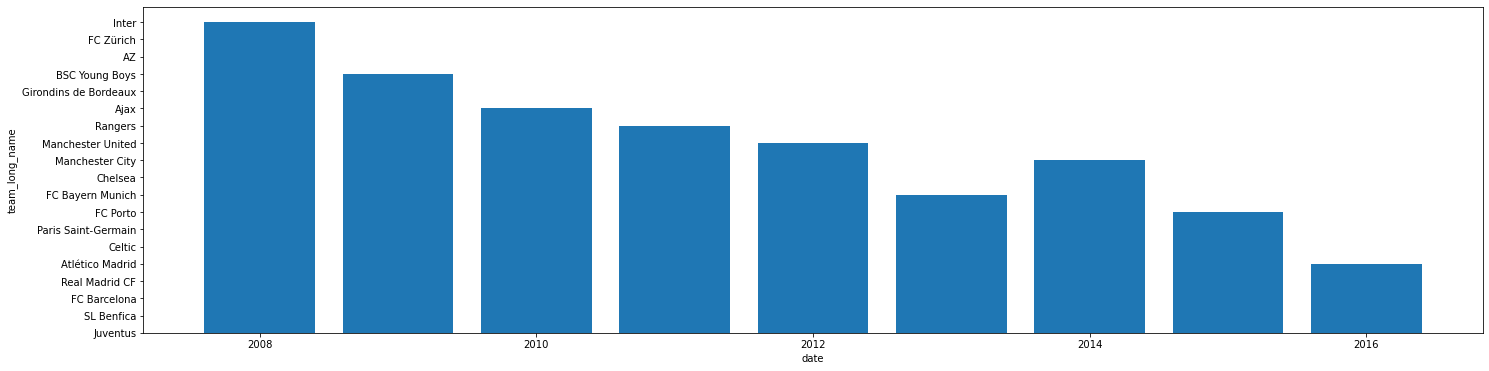

In [26]:
#Ploting results to follow up the changes over the years
plt.figure(figsize=(24,6))
plt.bar(Teams['date'], Teams['team_long_name']);
plt.xlabel("date")
plt.ylabel("team_long_name")
plt.show()

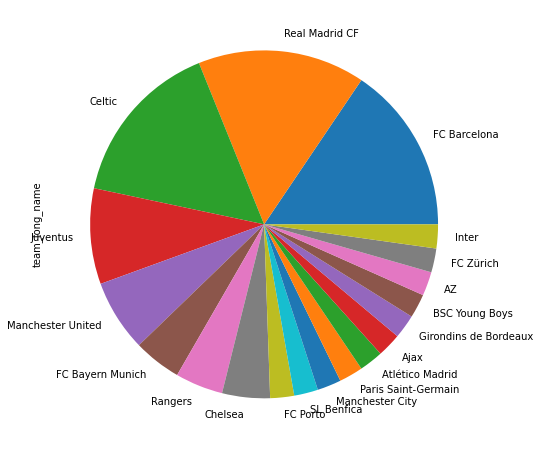

In [27]:
#Ploting with Pie shape to have more clear visualize
Teams['team_long_name'].value_counts('win').plot(kind='pie', figsize=(8, 8));

In [28]:
# What team attributes lead to the most victories?
# Data Cleaning from team_attributes
team_attributes = pd.read_sql("""SELECT * FROM Team_Attributes;""",engine)
team_attributes.fillna(team_attributes.mean(), inplace=True)
sum(team_attributes.duplicated())
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            1458 non-null   float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

C:\Users\admin\AppData\Local\Temp/ipykernel_27448/1732203263.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  team_attributes.fillna(team_attributes.mean(), inplace=True)


In [29]:
#Mergine between tables and sort it ,with given chance for more visualize exploring
Winner_Atribute = pd.merge(left=Teams, right=team_attributes, left_on='Team id', right_on='team_api_id')
del Winner_Atribute["date_x"]
Winner_Atribute.head(40)

,team_long_name,win,goals,Team id,id,team_fifa_api_id,team_api_id,date_y,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Juventus,19,48,8634,119,241,8634,2010-02-22 00:00:00,42,Balanced,...,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
1,Juventus,19,48,8634,120,241,8634,2011-02-22 00:00:00,43,Balanced,...,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
2,Juventus,19,48,8634,121,241,8634,2012-02-22 00:00:00,24,Slow,...,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
3,Juventus,19,48,8634,122,241,8634,2013-09-20 00:00:00,35,Balanced,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
4,Juventus,19,48,8634,123,241,8634,2014-09-19 00:00:00,35,Balanced,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
5,Juventus,19,48,8634,124,241,8634,2015-09-10 00:00:00,36,Balanced,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover
6,FC Barcelona,17,78,8634,119,241,8634,2010-02-22 00:00:00,42,Balanced,...,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
7,FC Barcelona,17,78,8634,120,241,8634,2011-02-22 00:00:00,43,Balanced,...,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
8,FC Barcelona,17,78,8634,121,241,8634,2012-02-22 00:00:00,24,Slow,...,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
9,FC Barcelona,17,78,8634,122,241,8634,2013-09-20 00:00:00,35,Balanced,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover


In [30]:
#Which players had the most penalties?
## Data Cleaning from Player_Attributes
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes;""",engine)
Player_Attributes.fillna(Player_Attributes.mean(), inplace=True)
Player_Attributes.info()
sum(Player_Attributes.duplicated())

C:\Users\admin\AppData\Local\Temp/ipykernel_27448/2693280883.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Player_Attributes.fillna(Player_Attributes.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183978 non-null  float64
 5   potential            183978 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183978 non-null  float64
 10  finishing            183978 non-null  float64
 11  heading_accuracy     183978 non-null  float64
 12  short_passing        183978 non-null  float64
 13  volleys              183978 non-null  float64
 14  dribbling            183978 non-null  float64
 15  curve            

0

In [31]:
# investigate Player_Attributes Table
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes;""",engine)
# investigate Player Table
Player = pd.read_sql("""SELECT * FROM Player;""",engine)
# investigate Penalties
Penalties = Player_Attributes.groupby(['player_api_id']).agg({'penalties':'count'}).reset_index().sort_values(['penalties'], ascending =False)             
# Players had the most penalties
players_Penalties = pd.merge(left=Penalties, right=Player, left_on='player_api_id', right_on='player_api_id')
top10 = players_Penalties[['penalties','player_name']]
top10 = players_Penalties.iloc[0:10]
top10

,player_api_id,penalties,id,player_name,player_fifa_api_id,birthday,height,weight
0,210278,56,9073,Roberto Pereyra,193061,1991-01-07 00:00:00,182.88,170
1,41269,56,396,Alessio Cerci,178393,1987-07-23 00:00:00,180.34,172
2,26472,54,7338,Michael Bradley,155887,1987-07-31 00:00:00,187.96,174
3,179795,53,10879,Yacine Brahimi,184267,1990-02-08 00:00:00,175.26,146
4,41890,53,1863,Claudio Marchisio,173210,1986-01-19 00:00:00,180.34,157
5,30453,51,8614,Phillippe Mexes,41635,1982-03-30 00:00:00,187.96,181
6,25772,51,11030,Zdravko Kuzmanovic,168650,1987-09-22 00:00:00,185.42,176
7,47394,50,141,Adel Taarabt,179605,1989-05-24 00:00:00,180.34,172
8,56916,50,1049,Aurelien Chedjou,183284,1985-06-20 00:00:00,182.88,190
9,40930,48,200,Adrien Silva,184826,1989-03-15 00:00:00,175.26,152


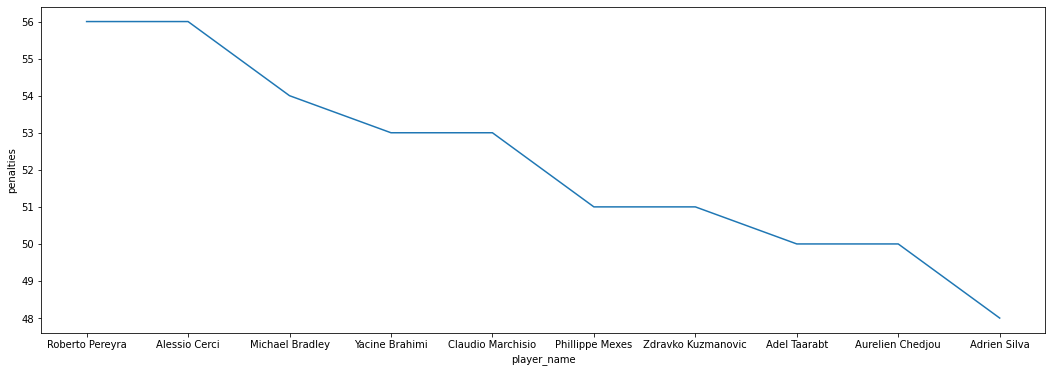

In [32]:
#Ploting results to follow up the players with the most penalties
plt.figure(figsize=(18,6))
plt.plot(top10['player_name'], top10['penalties']);
plt.xlabel("player_name")
plt.ylabel("penalties")
plt.show()

In [52]:
#Conclusions
#Results:
    #1. Teams improved the most over the time period ,we can follow up their performance more closely starting from season of 2013 ,with excluding some results from 2014 , as these teams their performace has been decreased for the next two years
    #2. Team attributes lead to the most victories,we should concentrate on defenceDefenderLineClass & chanceCreationShootingClass as there's correlations between this element and team performance 
    #3. players had the most penalties are Roberto Pereyra & Alessio Cerci
#Limitations :
    #1. Big matches need to be in seperate column with sorting the values as the follow (final or semi final) as this would be more helpful ,as stages are not enough for such info
    #2. As soccer fan there's some indicators are missing over here such as xG (The possibility of scoring goals) which is measuring the time between each goal for each player ,and this showing the stability in scoring for each player more than number of penalties ,at the end soccer is a group game not indiviual game.
    
    
    